#Traffic Accident Prediction

 link https://www.kaggle.com/code/i0nlyaziz/traffic-accident-prediction/notebook

Introduction


In this project, we aim to predict the likelihood of traffic accidents based on various environmental, roadway, and driver-related factors such as weather, road type, speed limit, and more.

Understanding the main contributors to traffic accidents can help authorities improve road safety, guide infrastructure planning, and support proactive interventions that reduce risks. With the power of data science and machine learning, we can uncover hidden patterns and build accurate predictive models to support smarter transportation systems.

##Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

##Load the data

In [2]:
df = pd.read_csv("Traffic Accident Prediction.csv")

##Exploring tha data

In [3]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [4]:
df.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [5]:
df.duplicated().sum()

np.int64(14)

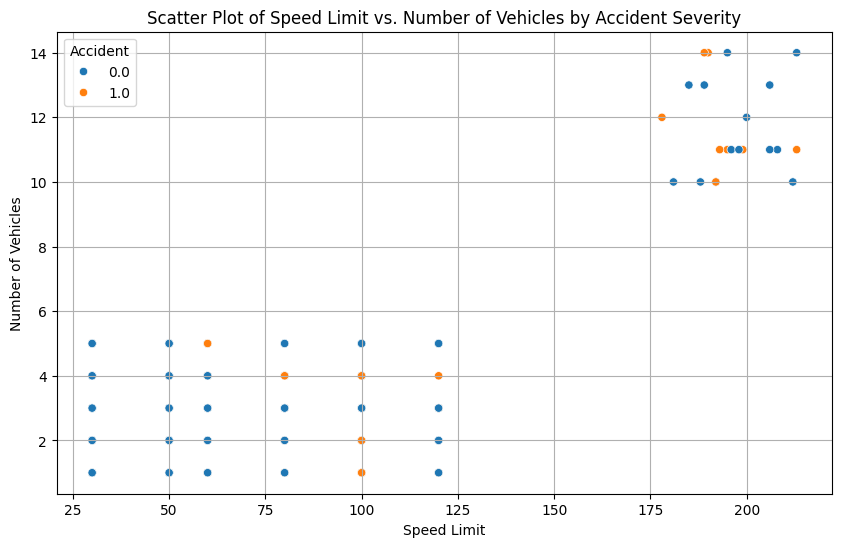

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Speed_Limit', y='Number_of_Vehicles', hue='Accident')
plt.title('Scatter Plot of Speed Limit vs. Number of Vehicles by Accident Severity')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [8]:
df.shape

(840, 14)

##Preprocessing

In [9]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(-999, inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna('Unknown', inplace=True)


# Display the number of nulls and duplicates after this operation
print(df.isnull().sum())
print(df.duplicated().sum())

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64
14


/tmp/ipython-input-3787901556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(-999, inplace=True)
/tmp/ipython-input-3787901556.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [10]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Unknown,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,-999.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


Correlation Matrix:


,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
Traffic_Density,1.000000,-0.028523,-0.027798,-0.027703,-0.005542,-0.055472,-0.002355
Speed_Limit,-0.028523,1.000000,-0.054509,-0.030750,-0.056408,-0.029922,-0.027208
Number_of_Vehicles,-0.027798,-0.054509,1.000000,-0.052160,-0.025737,0.024026,0.047800
Driver_Alcohol,-0.027703,-0.030750,-0.052160,1.000000,0.047513,-0.002601,-0.002672
Driver_Age,-0.005542,-0.056408,-0.025737,0.047513,1.000000,0.028787,0.001785
Driver_Experience,-0.055472,-0.029922,0.024026,-0.002601,0.028787,1.000000,-0.022531
Accident,-0.002355,-0.027208,0.047800,-0.002672,0.001785,-0.022531,1.000000


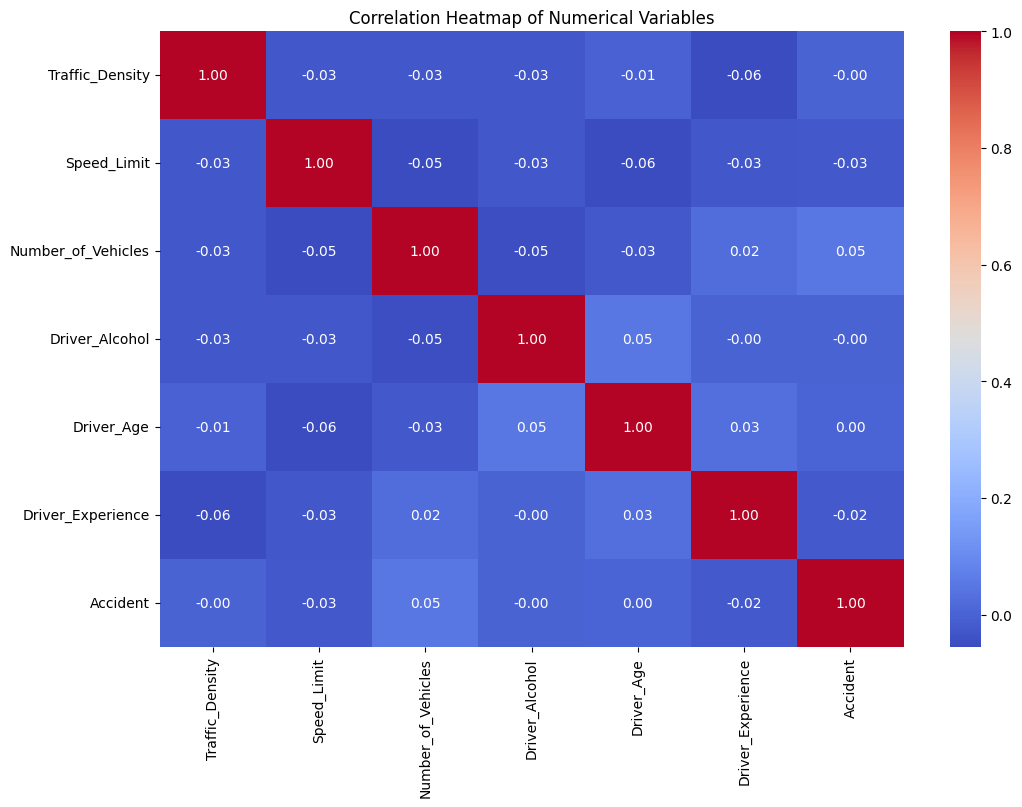

In [11]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Optional: Display a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [12]:
# Dropping columns with low correlation to 'Accident'
cols_to_drop = ['Traffic_Density', 'Speed_Limit', 'Driver_Alcohol', 'Driver_Age', 'Driver_Experience']
df = df.drop(columns=cols_to_drop)

# Display the first few rows of the dataframe after dropping columns
display(df.head())

,Weather,Road_Type,Time_of_Day,Number_of_Vehicles,Accident_Severity,Road_Condition,Vehicle_Type,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,5.0,Unknown,Wet,Car,Artificial Light,0.0
1,Clear,Rural Road,Night,3.0,Moderate,Wet,Truck,Artificial Light,0.0
2,Rainy,Highway,Evening,4.0,Low,Icy,Car,Artificial Light,0.0
3,Clear,City Road,Afternoon,3.0,Low,Under Construction,Bus,Daylight,0.0
4,Rainy,Highway,Morning,11.0,Low,Dry,Car,Artificial Light,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    object 
 1   Road_Type             840 non-null    object 
 2   Time_of_Day           840 non-null    object 
 3   Number_of_Vehicles    840 non-null    float64
 4   Accident_Severity     840 non-null    object 
 5   Road_Condition        840 non-null    object 
 6   Vehicle_Type          840 non-null    object 
 7   Road_Light_Condition  840 non-null    object 
 8   Accident              840 non-null    float64
dtypes: float64(2), object(7)
memory usage: 59.2+ KB


In [14]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
Low,478
Moderate,241
High,79
Unknown,42


In [15]:
df['Accident_Severity'] = df['Accident_Severity'].replace({"Low":0,"Moderate":1,"High":2,"Unknown":3,})

/tmp/ipython-input-1185759991.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Accident_Severity'] = df['Accident_Severity'].replace({"Low":0,"Moderate":1,"High":2,"Unknown":3,})


In [16]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
0,478
1,241
2,79
3,42


In [17]:
df['Road_Light_Condition'].value_counts()

,count
Road_Light_Condition,
Artificial Light,402
Daylight,320
No Light,76
Unknown,42


In [18]:
df['Road_Light_Condition'] = df['Road_Light_Condition'].replace({"Artificial Light":0,"Daylight":1,"No Light":2,"Unknown":3,})

/tmp/ipython-input-2266489189.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Road_Light_Condition'] = df['Road_Light_Condition'].replace({"Artificial Light":0,"Daylight":1,"No Light":2,"Unknown":3,})


In [19]:
df['Vehicle_Type'].value_counts()

,count
Vehicle_Type,
Car,589
Truck,99
Motorcycle,86
Unknown,42
Bus,24


In [20]:
df['Vehicle_Type'] = df['Vehicle_Type'].replace({"Car":0,"Truck":1,"Motorcycle":2,"Unknown":3,"Bus":3})

/tmp/ipython-input-1188962616.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Vehicle_Type'] = df['Vehicle_Type'].replace({"Car":0,"Truck":1,"Motorcycle":2,"Unknown":3,"Bus":3})


In [21]:
df['Vehicle_Type'].value_counts()

,count
Vehicle_Type,
0,589
1,99
2,86
3,66


In [22]:
df['Road_Condition'].value_counts()

,count
Road_Condition,
Dry,400
Icy,154
Wet,153
Under Construction,91
Unknown,42


In [23]:
df['Accident'].value_counts()

,count
Accident,
0.0,559
1.0,239
-999.0,42


In [24]:
df['Accident'] = df['Accident'].replace({0.0:0,1.0:1,-999.0:2})

In [25]:
df['Accident'].value_counts()

,count
Accident,
0.0,559
1.0,239
2.0,42


In [26]:
df['Road_Condition'] = df['Road_Condition'].replace({"Dry":0,"Icy":1,"Wet":2,"Under Construction":3,"Unknown":3})

/tmp/ipython-input-4157209130.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Road_Condition'] = df['Road_Condition'].replace({"Dry":0,"Icy":1,"Wet":2,"Under Construction":3,"Unknown":3})


In [27]:
# Manually replace values in 'Weather'
weather_mapping = {
    'Rainy': 0,
    'Clear': 1,
    'Foggy': 2,
    'Snowy': 3,
    'Unknown': 4,
    'Stormy': 5
}
df['Weather'] = df['Weather'].replace(weather_mapping)

# Manually replace values in 'Road_Type'
road_type_mapping = {
    'City Road': 0,
    'Rural Road': 1,
    'Highway': 2,
    'Unknown': 3,
    'Mountain Road': 4 # Added mapping for 'Mountain Road'
}
df['Road_Type'] = df['Road_Type'].replace(road_type_mapping)

# Manually replace values in 'Time_of_Day'
time_of_day_mapping = {
    'Morning': 0,
    'Night': 1,
    'Evening': 2,
    'Afternoon': 3,
    'Unknown': 4
}
df['Time_of_Day'] = df['Time_of_Day'].replace(time_of_day_mapping)

# Display the updated dataframe
display(df.head())

/tmp/ipython-input-1524401389.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weather'] = df['Weather'].replace(weather_mapping)
/tmp/ipython-input-1524401389.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Road_Type'] = df['Road_Type'].replace(road_type_mapping)
/tmp/ipython-input-1524401389.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior,

,Weather,Road_Type,Time_of_Day,Number_of_Vehicles,Accident_Severity,Road_Condition,Vehicle_Type,Road_Light_Condition,Accident
0,0,0,0,5.0,3,2,0,0,0.0
1,1,1,1,3.0,1,2,1,0,0.0
2,0,2,2,4.0,0,1,0,0,0.0
3,1,0,3,3.0,0,3,3,1,0.0
4,0,2,0,11.0,0,0,0,0,1.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    int64  
 1   Road_Type             840 non-null    int64  
 2   Time_of_Day           840 non-null    int64  
 3   Number_of_Vehicles    840 non-null    float64
 4   Accident_Severity     840 non-null    int64  
 5   Road_Condition        840 non-null    int64  
 6   Vehicle_Type          840 non-null    int64  
 7   Road_Light_Condition  840 non-null    int64  
 8   Accident              840 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 59.2 KB


In [29]:
display(df.head())

,Weather,Road_Type,Time_of_Day,Number_of_Vehicles,Accident_Severity,Road_Condition,Vehicle_Type,Road_Light_Condition,Accident
0,0,0,0,5.0,3,2,0,0,0.0
1,1,1,1,3.0,1,2,1,0,0.0
2,0,2,2,4.0,0,1,0,0,0.0
3,1,0,3,3.0,0,3,3,1,0.0
4,0,2,0,11.0,0,0,0,0,1.0


##training

In [30]:
x = df.drop(columns=['Accident'],axis=1)
y = df['Accident']

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [32]:
scaler  = StandardScaler()

In [33]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
lg = LogisticRegression()

In [35]:
lg.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = lg.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"""The Accuracy : {accuracy * 100:.2f}%""")


The Accuracy : 64.68%


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       163
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00        12

    accuracy                           0.65       252
   macro avg       0.22      0.33      0.26       252
weighted avg       0.42      0.65      0.51       252



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

In [43]:
# Train the Random Forest model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test)

In [45]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

print("\nRandom Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 62.30%

Random Forest Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.91      0.76       163
         1.0       0.35      0.10      0.16        77
         2.0       0.00      0.00      0.00        12

    accuracy                           0.62       252
   macro avg       0.33      0.34      0.31       252
weighted avg       0.53      0.62      0.54       252



This is higly imbalance data thats wy accu is low you can try with droping nan and duplicated and converting all cols to dtype int :D